In [301]:
import matplotlib.pyplot as plt
import numpy as np

from result_utilities import get_filepath, extract_figures, extract_stats

In [302]:
dura = 'shorter'


In [304]:
files = get_filepath(dura)
print(files)
# model = ['coxph', 'NNph', 'NNnph']
# files = []
# for i, path in enumerate(paths):
#     cases = ['central','iid','noniid']
#     strats = [None, None, 0]
#     centers = [1,4,4]
#     rounds = [[1], [1,5,20,100], [1,5,20,100]]
#     for j, case in enumerate(cases):  
#         for rnd in rounds[j]:
#             file = f'{path}/training_log_M{model[i]}C{case}S{strats[j]}C{centers[j]}L{rnd}.txt'
#             files.append(file)
#             print(file)

['./shorter/coxph-shorter/training_log_McoxphCcentralSNoneC1L1.txt', './shorter/coxph-shorter/training_log_McoxphCiidSNoneC4L1.txt', './shorter/coxph-shorter/training_log_McoxphCiidSNoneC4L5.txt', './shorter/coxph-shorter/training_log_McoxphCiidSNoneC4L20.txt', './shorter/coxph-shorter/training_log_McoxphCiidSNoneC4L100.txt', './shorter/coxph-shorter/training_log_McoxphCnoniidS0C4L1.txt', './shorter/coxph-shorter/training_log_McoxphCnoniidS0C4L5.txt', './shorter/coxph-shorter/training_log_McoxphCnoniidS0C4L20.txt', './shorter/coxph-shorter/training_log_McoxphCnoniidS0C4L100.txt', './shorter/nnph-shorter/training_log_MNNphCcentralSNoneC1L1.txt', './shorter/nnph-shorter/training_log_MNNphCiidSNoneC4L1.txt', './shorter/nnph-shorter/training_log_MNNphCiidSNoneC4L5.txt', './shorter/nnph-shorter/training_log_MNNphCiidSNoneC4L20.txt', './shorter/nnph-shorter/training_log_MNNphCiidSNoneC4L100.txt', './shorter/nnph-shorter/training_log_MNNphCnoniidS0C4L1.txt', './shorter/nnph-shorter/training_l

In [306]:
concordances, briers = extract_figures(files)
# for file in files:
#     with open(file, 'r') as f:
#         # print(file)
#         lines = f.read().splitlines()
#         last_line = lines[-1]
#         # print(last_line)
#         start = last_line.find('concordance: ') + len('concordance: ') 
#         end = 10        
#         concordance = float(last_line[start:start+end])
#         concordances.append(concordance)
#         # print(round(concordance * 100, 2))
#         start = last_line.find('Brier: ') + len('Brier: ') 
#         end = 10     
#         brier = float(last_line[start:start+end])
#         briers.append(brier)
#         # print(round(brier * 100, 2))


In [308]:
indiv_rounds, avg_rounds, std_rounds, indiv_concordances, avg_concordances, std_concordances, indiv_briers, avg_briers, std_briers = extract_stats(files)
dec = 2
for i in range(len(avg_concordances)):
    # print(concs)
    print(f'{round(100*avg_concordances[i],dec):.2f} +- {round(100*std_concordances[i],dec):.2f}' )
    # print(brs)
    # print(f'{round(100*avg_briers[i],dec):.2f} +- {round(100*std_briers[i],dec):.2f}' )        
    print(';')  

74.51 +- 0.19
;
74.53 +- 0.29
;
74.50 +- 0.49
;
74.45 +- 0.36
;
74.43 +- 0.15
;
74.28 +- 0.41
;
74.22 +- 0.24
;
73.19 +- 0.51
;
74.39 +- 0.26
;
74.67 +- 0.19
;
74.57 +- 0.35
;
74.49 +- 0.50
;
74.53 +- 0.34
;
73.73 +- 0.83
;
74.11 +- 0.29
;
73.65 +- 0.58
;
72.65 +- 1.55
;
67.33 +- 4.75
;
74.52 +- 0.23
;
74.70 +- 0.45
;
74.70 +- 0.41
;
74.39 +- 0.46
;
73.15 +- 0.70
;
70.44 +- 3.66
;
71.30 +- 2.99
;
53.66 +- 9.77
;
53.40 +- 9.24
;


(0.5, 11.5, 0.7, 0.76)

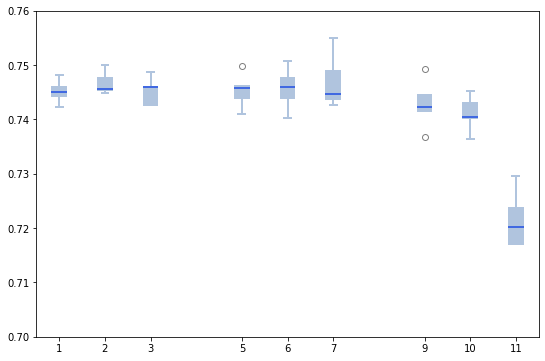

In [309]:
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
# base= 1 
adj = 9
for i,base in enumerate([0,1,5]):
    bp = ax.boxplot([indiv_concordances[i] for i in [base,base+adj,base+2*adj]], patch_artist=True, positions = [1+4*i,2+4*i,3+4*i])
    for box in bp['boxes']:
        # change outline color
        box.set( color='lightsteelblue', linewidth=2)
        # change fill color
        box.set( facecolor = 'lightsteelblue' )

    for whisker in bp['whiskers']:
        whisker.set(color='lightsteelblue', linewidth=2)
    for cap in bp['caps']:
        cap.set(color='lightsteelblue', linewidth=2)

    for median in bp['medians']:
        median.set(color='royalblue', linewidth=2)

    for flier in bp['fliers']:
        flier.set(marker='o', color='#e7298a', alpha=0.5)
# fig.savefig('fig1.png', bbox_inches='tight')
x1,x2,y1,y2 = ax.axis()  
ax.axis((x1,x2,0.7,0.76))